Create a bar plot that shows distribution of german and british citizens in terms of age.

<IPython.core.display.Javascript object>


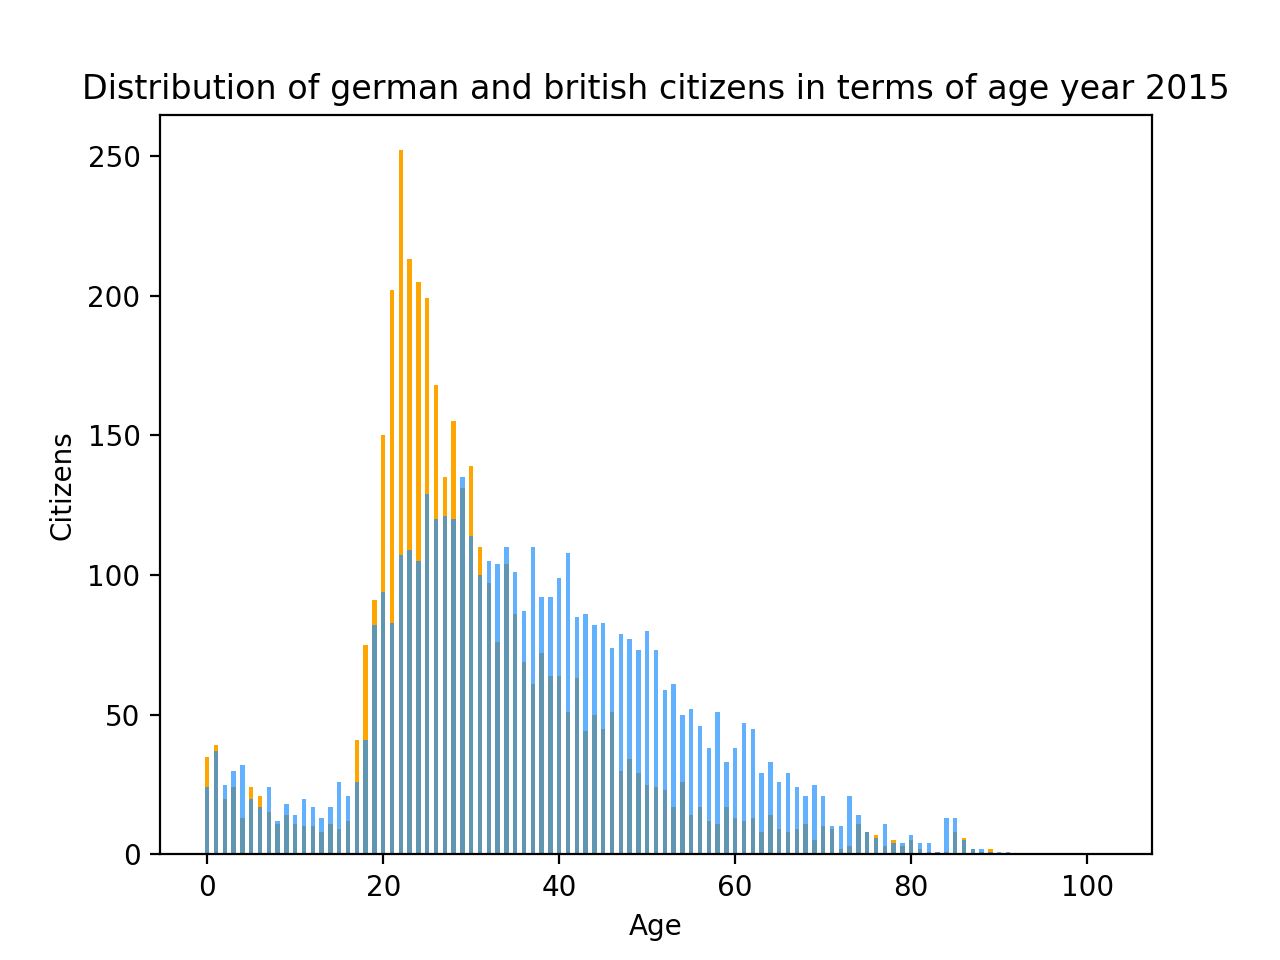

Text(0, 0.5, 'Citizens')

In [1]:
#Installing matplotlib
!pip install matplotlib

%matplotlib notebook
import matplotlib.pyplot as plt

import kkdata
stats = kkdata.STATISTICS

germans = {}

brits = {}

year = 2015

#iterating through the object structure to retrieve age values
for neighborhood in stats[year]:
        for age in stats[year][neighborhood]:
            for statecode in stats[year][neighborhood][age]:
                
                #Setting the country dictionary
                dictionary = None
                #If the statecode is german
                if(statecode == 5180):
                    dictionary = germans
                #If the statecode is british
                elif(statecode == 5170):
                    dictionary = brits
                
                #If the country dictionary is not none
                if(dictionary is not None):
                    #sets it default first time to make sure 
                    #that the age-key is instantiated in the 
                    #dict object
                    dictionary.setdefault(age, 0)
                    #Defining number of citizens of age
                    numCitizensInAge = stats[year][neighborhood][age][statecode]
                    
                    #counts up the age count
                    dictionary[age] += numCitizensInAge
  
#Getting one set of keys from both sets of keys
germanKeys = list(germans.keys())
britKeys = list(brits.keys())
allAges = list(set(germanKeys + britKeys))

#making sure that both sets contains all keys
for age in allAges:
    germans.setdefault(age,0)
    brits.setdefault(age,0)

#Plotting the data
plt.bar(allAges, germans.values(), width=0.5,linewidth=0, align="center", color="orange" )
plt.bar(allAges, brits.values(), width=0.5,linewidth=0, align="center", alpha=0.7, color="dodgerblue")
plt.title(f'Distribution of german and british citizens in terms of age year {year}')
plt.xlabel("Age")
plt.ylabel("Citizens")

How many French are there compared to Germans and how are they distributed over various neighbourhoods?

<IPython.core.display.Javascript object>


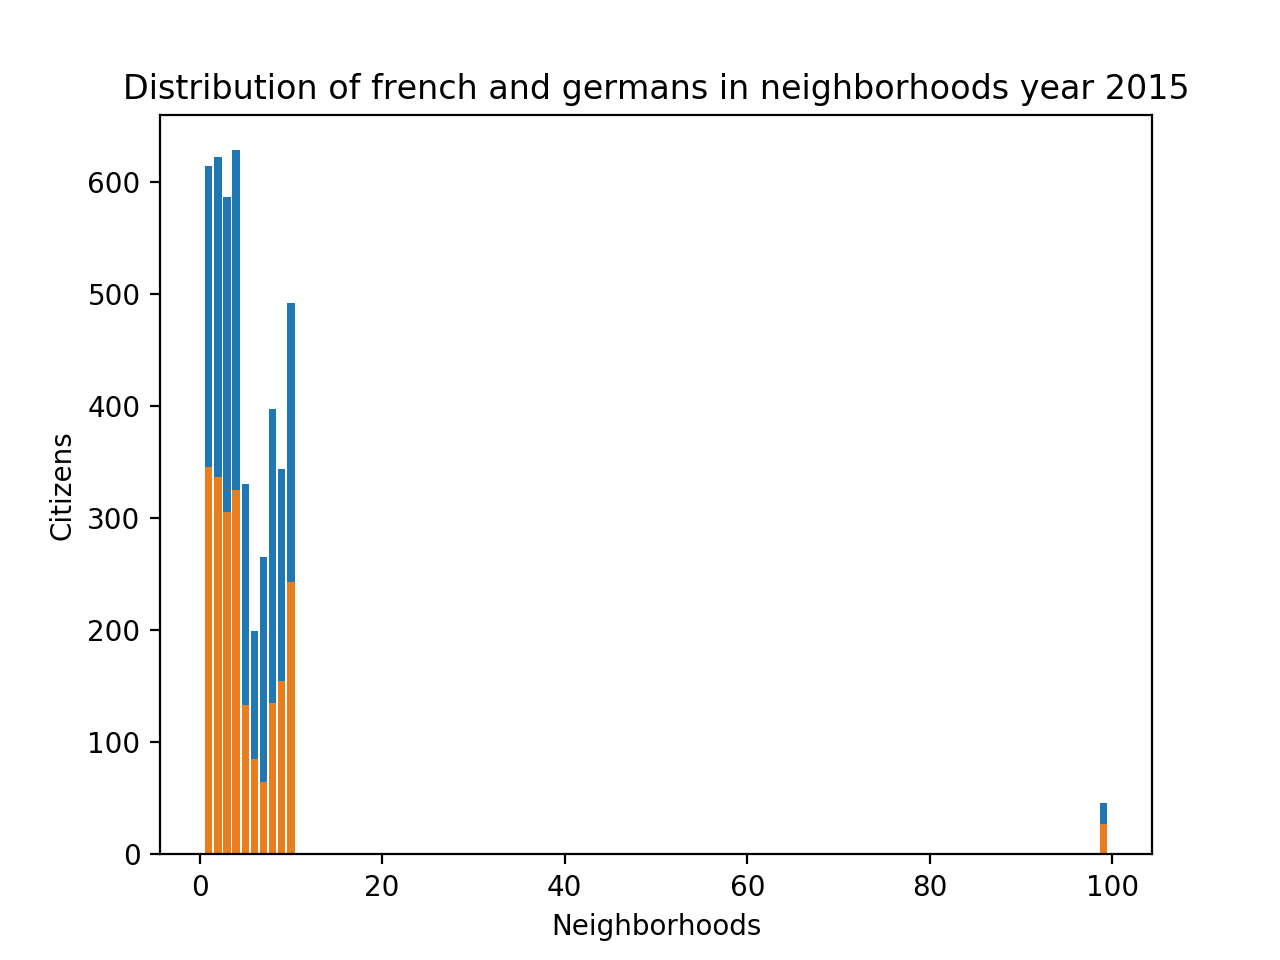

Text(0.5, 1.0, 'Distribution of french and germans in neighborhoods year 2015')

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import kkdata
stats = kkdata.STATISTICS

germans = {}

french = {}

year = 2015

for neighborhood in stats[year]:
    germans.setdefault(neighborhood, 0)
    french.setdefault(neighborhood, 0)
    for key, value in stats[year][neighborhood].items():
        #Taking the values if they exist directly in the map 
        if 5130 in value.keys(): germans[neighborhood] += value[5130]
        if 5170 in value.keys(): french[neighborhood] += value[5170]

germanNeigh = list(germans.keys())
frenchNeigh = list(french.keys())
allNeighborhoods = list(set(germanNeigh + frenchNeigh))


for neighborhood in allNeighborhoods:
    germans.setdefault(neighborhood,0)
    brits.setdefault(neighborhood,0)

plt.bar(allNeighborhoods, french.values())
plt.bar(allNeighborhoods, germans.values(), alpha=0.9)
plt.xlabel("Neighborhoods")
plt.ylabel("Citizens")
plt.title(f"Distribution of french and germans in neighborhoods year {year}")

Create a pie chart showing the 5 major citizen groups of age between 20-65

<IPython.core.display.Javascript object>


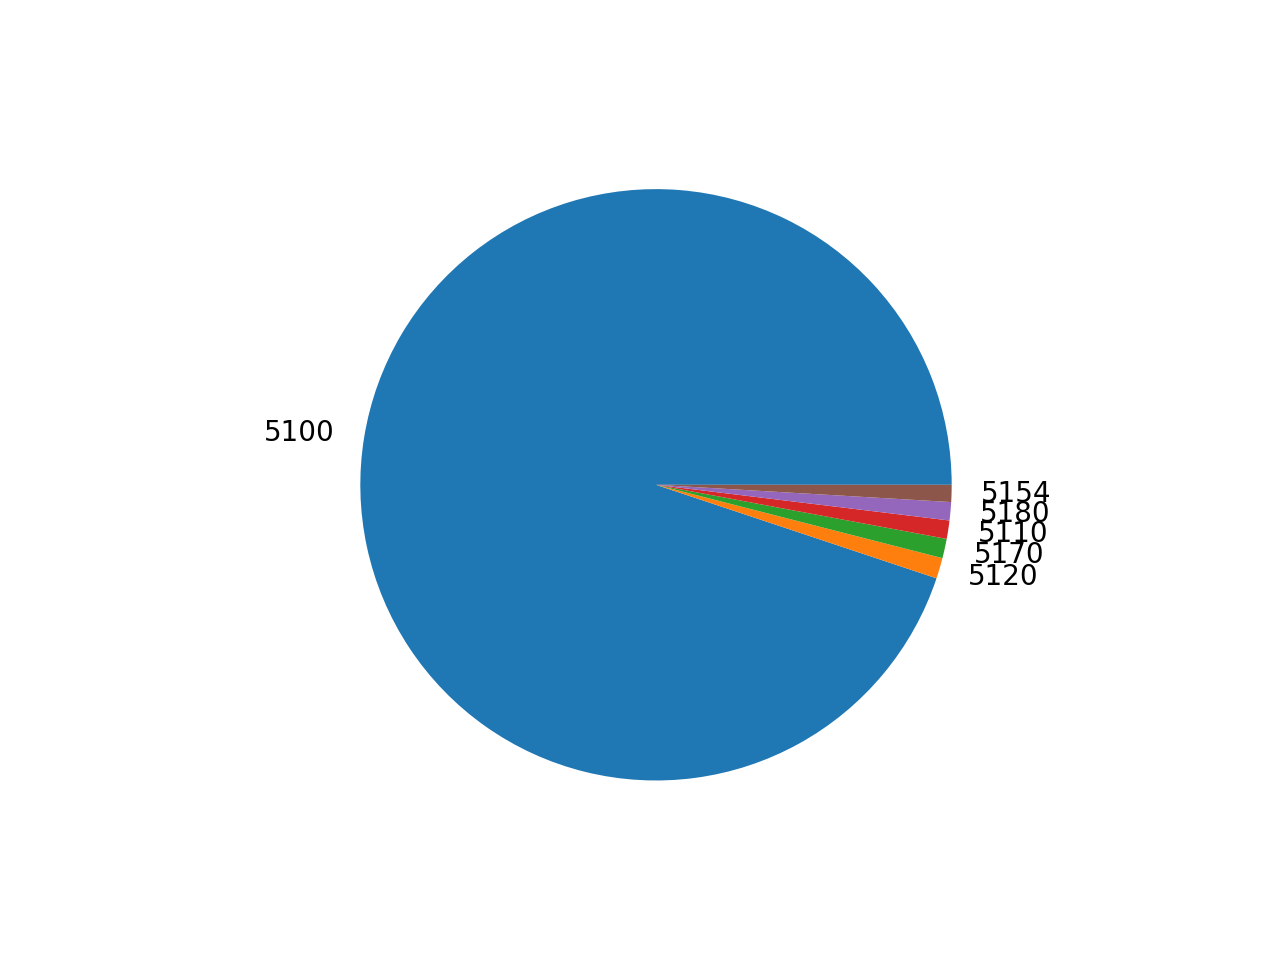

([<matplotlib.patches.Wedge at 0x116c2c198>,
 [Text(-1.0857915470289354, 0.17622915876923276, '5100'),
  Text(1.0552355381594403, -0.31060901307810884, '5120'),
  Text(1.074105805663414, -0.23726929476893674, '5170'),
  Text(1.0872170731306123, -0.16720955682407926, '5110'),
  Text(1.0955694900981732, -0.09862805060442414, '5180'),
  Text(1.0995302375173004, -0.032144311863055997, '5154')])

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

import kkdata
stats = kkdata.STATISTICS

citizenGroups = {}

year = 2015

yearRange = (20,65)

for neighborhood in stats[year]:
    for age in range(yearRange[0],yearRange[1] + 1):
        for statecode, value in stats[year][neighborhood][age].items():
            citizenGroups.setdefault(statecode, 0)
            citizenGroups[statecode] += value

#sorting data and retrieving the first 5 elements on the list as a list of tuples
pieData =  sorted(citizenGroups.items(), key=lambda kv: -kv[1])[0:6]

#Converting list of tuples to dictionary
pieData = dict(pieData)

plt.pie(pieData.values(), labels=pieData.keys())

(red assignment) Try to add the markers that you get from the GeoJson response exercise 2 to the map.

In [4]:
#Installing folium
!pip install folium

##Danish Airports

import folium

#Defining airport data
data = [
    ([55.618002, 12.650714], "Københavns Lufthavn"),
    ([56.3, 10.618889], "Aarhus Lufthavn"),
    ([55.740278, 9.151667],"Billund Lufthavn"),
    ([55.525833, 8.553333],"Esbjerg Lufthavn"),
    ([57.086111, 9.871389],"Aalborg Lufthavn")]

#Creating map
m = folium.Map(
    location=[56.000, 10.600], 
    zoom_start=7)

#Creating Markers on map
for coord in data:
    folium.Marker(coord[0], popup=coord[1]).add_to(m)
    
m